# An Analysis for the Data on Last Words...

### First, import the libraries we're going to need. And also read the data from the csv file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import math
import itertools
from collections import Counter

df = pd.read_csv("last_words_csv1.csv")  # Read the csv file we made from earlier.

# I noticed after reading the file, it added a "Unnamed" column. Not useful, so I'll remove it.
df = df.loc[:, ~df.columns.str.contains('^Unnamed')]
df.head()

,TRANSCRIPT,AIRLINE,FLIGHT,LAST WORDS
0,07 Jul 1962,Alitalia,771,"Unable to make out your last message, will you..."
1,07 May 1964,Pacific Air Lines,773,Skipper's shot! We've been shot. I was trying ...
2,08 Nov 1965,American Airlines,383,Have you still got the runway OK? Ah .. just b...
3,30 Jun 1967,Thai International,601,I have no radar contact with you.
4,06 Nov 1967,Trans World Airlines,159,Not very # far off the runway. Sure as # isn't.


### Making a bar chart showing the highest number of airlines that had crashed planes.

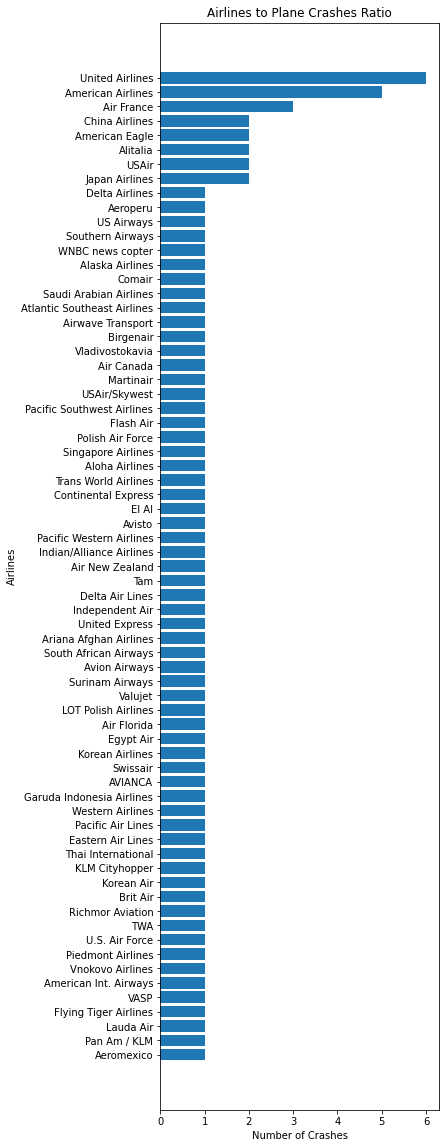

'Based off this data, it looks like United Airlines has had the most planes crash. (With last words recorded anyway.)'

In [2]:
# Get the name and number of crashes for each airline as a dictionary.
airlines_dict = (df["AIRLINE"].value_counts().to_dict())

plt.figure(figsize=(5, 20))  # Increase the size so labels don't merge.

# Get the names and number of crashes as lists.
airline_names = list(airlines_dict.keys())
airline_crashes = list(airlines_dict.values())

# Make a chart of the names and chases, but reverse each so the highest value is at the top.
plt.barh(list(reversed(airline_names)), list(reversed(airline_crashes)))

plt.xlabel("Number of Crashes")
plt.ylabel("Airlines")
plt.title("Airlines to Plane Crashes Ratio")
plt.show()

"""Based off this data, it looks like United Airlines has had the most planes crash. (With last words recorded anyway.)"""

### What are the years with the most plane crashes?

#### First we need to select the data we're going to need.

In [3]:
# Get the TRANSCRIPT column as a list.
years = (list(df.TRANSCRIPT))

# Get only the year of each item within the list.
years = [year[-4:] for year in years]

# Within 'years' there are duplicates. This is so we only have one of each year.
each_year = (list(set(years)))

# Turn all the strings into integers. 
each_year = [int(year) for year in each_year]

# Sort all the years from lowest to highest so they match 'number_of_crashes_each_year' latter.
each_year = sorted(each_year)

number_of_crashes_each_year = []

# Find out how many crashes happened each year, as a list.
for i in each_year:
    number_of_crashes_each_year.append(years.count(str(i)))

# Put 'each_year' and 'number_of_crashes_each_year' into a dictionary.
plane_crashes_years = dict(zip(each_year, number_of_crashes_each_year))
    
print(plane_crashes_years)  # Print to be sure they match.
"""Looks like they match. I already double checked by going back to the web page."""

{1962: 1, 1964: 1, 1965: 1, 1967: 2, 1968: 1, 1969: 2, 1970: 1, 1972: 2, 1977: 2, 1978: 4, 1979: 3, 1980: 1, 1982: 1, 1983: 1, 1985: 2, 1986: 2, 1987: 2, 1988: 4, 1989: 5, 1990: 1, 1991: 3, 1992: 2, 1993: 2, 1994: 6, 1995: 3, 1996: 6, 1997: 2, 1998: 2, 1999: 2, 2000: 6, 2001: 3, 2002: 1, 2003: 1, 2004: 1, 2006: 1, 2007: 1, 2009: 3, 2010: 1}


'Looks like they match. I already double checked by going back to the web page.'

#### Plot the new data to find out how many crashes happened each year.

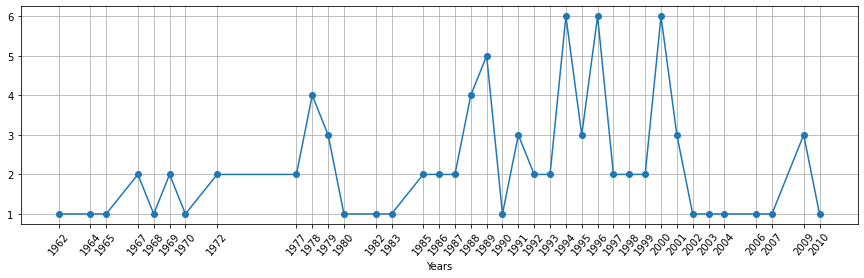

'Looks like 1994, 1996 and 2000 are the highest years for plane crashes.\nAnd we can also see that there was 0 crashes in the mid-70s, according to this data.\nPlus, 1989 is the only year to have 5 crashes. By crashes of course, we mean crashes with no recorded last words.'

In [4]:
plt.figure(figsize=(15, 4))

# This is so we only see the years a crash happened, rather then just every ten years.
axes = plt.axes()
axes.set_xticks(list(plane_crashes_years.keys()))

# Plot the years, and number of crashes for each year.
plt.plot(list(plane_crashes_years.keys()), list(plane_crashes_years.values()), "o-")

plt.xlabel("Years")
plt.xticks(rotation=50)
plt.grid()
plt.show()
"""Looks like 1994, 1996 and 2000 are the highest years for plane crashes.
And we can also see that there was 0 crashes in the mid-70s, according to this data.
Plus, 1989 is the only year to have 5 crashes. By crashes of course, we mean crashes with no recorded last words."""

### What are the months with the most plane crashes?

#### First we need to select the data we're going to need. (Alot of code from the years' analysis)

In [5]:
# Get the TRANSCRIPT column as a list.
months = (list(df.TRANSCRIPT))

# Get only the month of each item within the list.
months = [(re.findall(r'\w+', month[2:]))[0] for month in months]

# Be sure the first letter of each abbreviation is upper case.
# Some for the months' abbreviations are four characters long; so let's be sure we only get three. 
# Also some are misspelled, but adding .title() fixes that.
months = [month[0:3].title() for month in months]

# Within 'months' there are duplicates. This is so we only have one of each month.
each_month = (list(set(months)))

# Find out how many crashes happened each month, as a list.
number_of_crashes_each_month = [months.count(month) for month in each_month]

# Put 'each_month' and 'number_of_crashes_each_month' into a dictionary.
plane_crashes_months = dict(zip(each_month, number_of_crashes_each_month))

# The month abbreviations are not ordered. So I'll type them out myself.
month_abbreviations  = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# This is so we get the order of the number of crashes for each month.
month_values = [plane_crashes_months.get(month_abbreviation) for month_abbreviation in month_abbreviations]
    
print(plane_crashes_months)  # Print to be sure they match.
"""Looks like they match. I already double checked by going back to the web page."""

{'Aug': 11, 'Oct': 7, 'Feb': 8, 'Jun': 7, 'Jul': 10, 'Nov': 7, 'Dec': 7, 'Mar': 4, 'Apr': 5, 'Jan': 7, 'Sep': 7, 'May': 5}


'Looks like they match. I already double checked by going back to the web page.'

#### Plot the new data to find out how many crashes happened each month. (Like before in the years' analysis.)

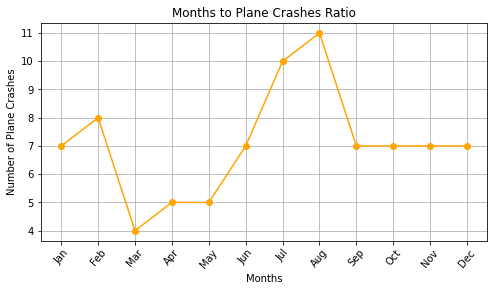

'Looks like August has the most plane crashes, with July in second. \n Seams like March is the lowest. And seven is the most common through out the data. \n Also the sum of all the crashes would be 85.0'

In [6]:
plt.figure(figsize=(8, 4))

# This is so we only see the years a crash happened, rather then just every ten years.
axes = plt.axes()
ticks = range(0, 15)
axes.set_xticks(list(ticks))
axes.set_yticks(list(ticks))

# Plot the years, and number of crashes for each year.
plt.plot(month_abbreviations, month_values, "o-", color="orange")

plt.title("Months to Plane Crashes Ratio")
plt.xlabel("Months")
plt.ylabel("Number of Plane Crashes")
plt.xticks(rotation=50)
plt.grid()
plt.show()
f"""Looks like August has the most plane crashes, with July in second. 
 Seams like March is the lowest. And seven is the most common through out the data. 
 Also the sum of all the crashes would be {math.fsum(month_values)}"""  # Sum is 85.

### What are the days with the most plane crashes?

#### First we need to select the days we're going to need. (Alot of code from the years' analysis.)

In [7]:
# Get the TRANSCRIPT column as a list.
days = (list(df.TRANSCRIPT))

# Get only the day of each item within the list.
days = [int(day[:2]) for day in days]

# Within 'days' there are duplicates. This is so we only have one of each day.
each_day = (list(set(days)))

# Turn all strings into integers.
each_day = [int(day) for day in each_day]

# Sort all the days from lowest to highest so they match 'number_of_crashes_each_day' latter.
each_day = sorted(each_day)

number_of_crashes_each_day = []

# Find out how many crashes happened each day, as a list.
for i in each_day:
    number_of_crashes_each_day.append(days.count(i))

# Put 'each_day' and 'number_of_crashes_each_day' into a dictionary.
plane_crashes_days = dict(zip(each_day, number_of_crashes_each_day))
    
print(plane_crashes_days)  # Print to be sure they match.
"""Four crashes on the seventh and eight on the thirty-first. The same as on the web page."""

{1: 4, 2: 4, 3: 2, 4: 4, 5: 2, 6: 3, 7: 3, 8: 6, 9: 1, 10: 2, 11: 3, 12: 3, 13: 3, 15: 1, 16: 1, 17: 3, 18: 1, 19: 5, 20: 2, 21: 2, 22: 3, 23: 1, 24: 1, 25: 4, 26: 4, 27: 2, 28: 4, 29: 2, 30: 1, 31: 8}


'Four crashes on the seventh and eight on the thirty-first. The same as on the web page.'

#### Plot the new data to find out how many crashes happened each day. (Like before in the years' analysis.)

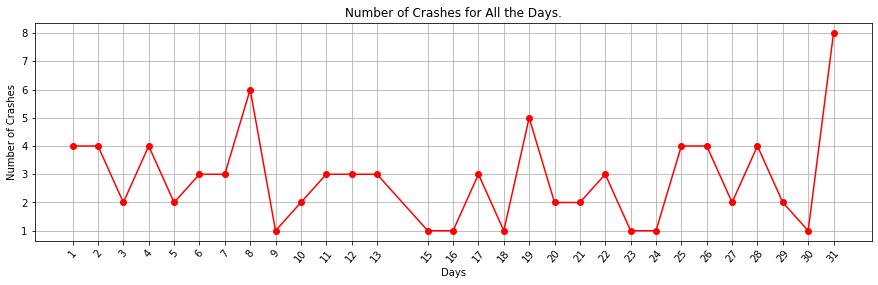

'Strangely, the thirty-first is the highest days with crashes. \n And there was no crashes on the fourteenth. By crashes of course, we mean crashes with no recorded last words.'

In [8]:
plt.figure(figsize=(15, 4))

# This is so we only see the days a crash happened, rather then just every ten days.
axes = plt.axes()
axes.set_xticks(list(plane_crashes_days.keys()))

# Plot the days, and number of crashes for each year.
plt.plot(list(plane_crashes_days.keys()), list(plane_crashes_days.values()), "o-", color="red")

plt.title("Number of Crashes for All the Days.")
plt.xlabel("Days")
plt.ylabel("Number of Crashes")
plt.xticks(rotation=50)
plt.grid()
plt.show()
"""Strangely, the thirty-first is the highest days with crashes. 
 And there was no crashes on the fourteenth. By crashes of course, we mean crashes with no recorded last words."""

### What were the fifteen most common last words recorded? 

#### First we need to select the data we're going to need. (Alot of code from the years' analysis.)

In [52]:
# Get the "LAST WORDS column as a list.
words = (list(df["LAST WORDS"]))

# Split all the strings, making each word a string in a list.
words = [word.split() for word in words]

# Get a list were each word is an item within the list.
words = (list(itertools.chain.from_iterable(words)))

# Make all the words lower case, so it's easier to work with.
words = [word.upper() for word in words]

# remove most special characters, punctuation and spaces from each string.
words = [re.sub('[^A-Za-z0-9-]', '', word) for word in words]

# Get the ten most common words.
most_common_words = Counter(words).most_common(15)

# Item 3 is just counting an empty string. So we might as well delete it.
del most_common_words[3]

# Get all the strings and integers as separate lists. Both match.
most_common_words_str = [word[0] for word in most_common_words]
most_common_words_num = [num[1] for num in most_common_words]

print(most_common_words)  # Print to see if they match.
"""It more hard to tell if it's right because we removed special characters, punctuation and spaces from each strings. 
 Unlike in the web page. but the word 'GOING' does not have any of that. So I used it to test, and they match the web page."""

[('THE', 22), ('WE', 17), ('IT', 16), ('WERE', 14), ('I', 11), ('GOING', 11), ('OH', 11), ('DOWN', 10), ('WHAT', 9), ('TO', 8), ('YOU', 8), ('HAVE', 8), ('OUT', 7), ('OFF', 7)]


"It more hard to tell if it's right because we removed special characters, punctuation and spaces from each strings. \n Unlike in the web page. but the word 'going' does not have any of that. So I used it to test, and they match the web page."

#### Now we can make a bar chart to show how many of each word was used.

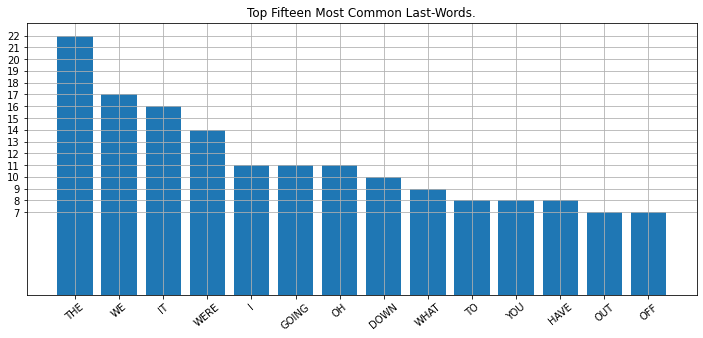

'Looks like THE is the highest on the list. GOING and DOWN are also used allot, as we might have expected.'

In [46]:
plt.figure(figsize=(12, 5))

# This is so we only see the days a crash happened, rather then just every ten days.
axes = plt.axes()
axes.set_yticks(range(7, 23))

# Plot the days, and number of crashes for each year.
plt.bar(most_common_words_str, most_common_words_num)

plt.title("Top Fifteen Most Common Last-Words.")
plt.xticks(rotation=40)
plt.grid()
plt.show()
"""Looks like 'THE' is the highest on the list. 'GOING' and 'DOWN' are also used allot, as we might have expected."""

#### What words were used the highest percent of times?

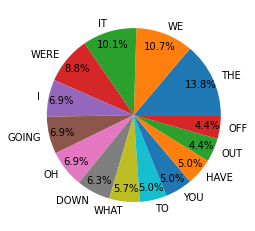

'Look like out of the 15 top words, THE, WE and IT were used the highest percent of the time.'

In [51]:
# Create a pie cart to easily show the percent of each word used.
plt.pie(most_common_words_num, labels=most_common_words_str, autopct='%1.1f%%', pctdistance=0.85)
plt.show()
"""Look like out of the 15 top words, THE, WE and IT were used the highest percent of the time."""